# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
import joblib

# Load data

In [2]:
df = pd.read_csv("Hypertension_data.csv")

# Exploratory Data Analysis (EDA)

In [3]:
# Show first 5 rows
print("\nData Sample (head):")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)


Data Sample (head):
   education  age    BMI  currentSmoker  prevalentHyp  heartRate
0          4   33  21.61              1             0         75
1          2   34  23.88              2             0         73
2          1   34  21.50              1             0         75
3          3   34  20.81              2             0         78
4          3   34  29.04              1             0         63

Summary Statistics:
         education          age          BMI  currentSmoker  prevalentHyp  \
count  2057.000000  2057.000000  2057.000000    2057.000000   2057.000000   
mean      2.217793    48.727759    26.144186       1.490520      0.383568   
std       1.087698     8.754586     3.927510       0.500032      0.486373   
min       1.000000    33.000000     3.000000       1.000000      0.000000   
25%       1.000000    41.000000    23.400000       1.000000      0.000000   
50%       2.000000    48.000000    25.940000       1.000000      0.000000   
75%       3.000000    55.0000

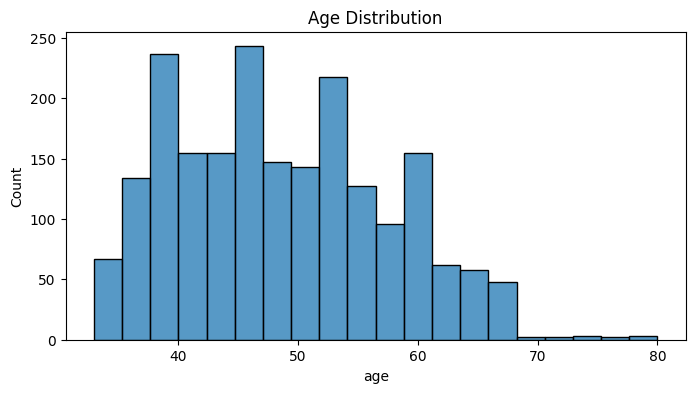

In [4]:
# Distribution of Age
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=20)
plt.title('Age Distribution')
plt.show()

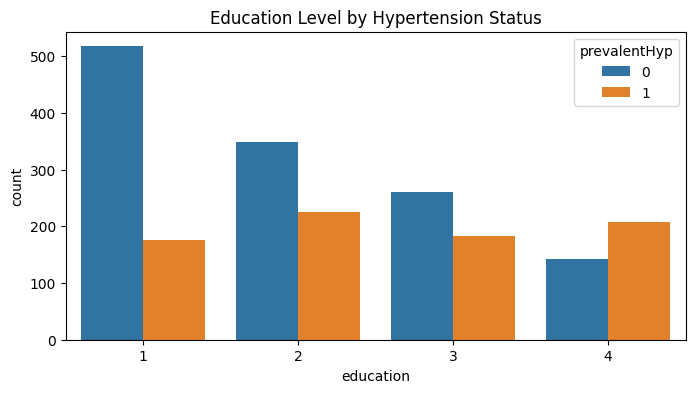

In [5]:
# Countplot for Education and Hypertension
plt.figure(figsize=(8,4))
sns.countplot(x='education', hue='prevalentHyp', data=df)
plt.title('Education Level by Hypertension Status')
plt.show()

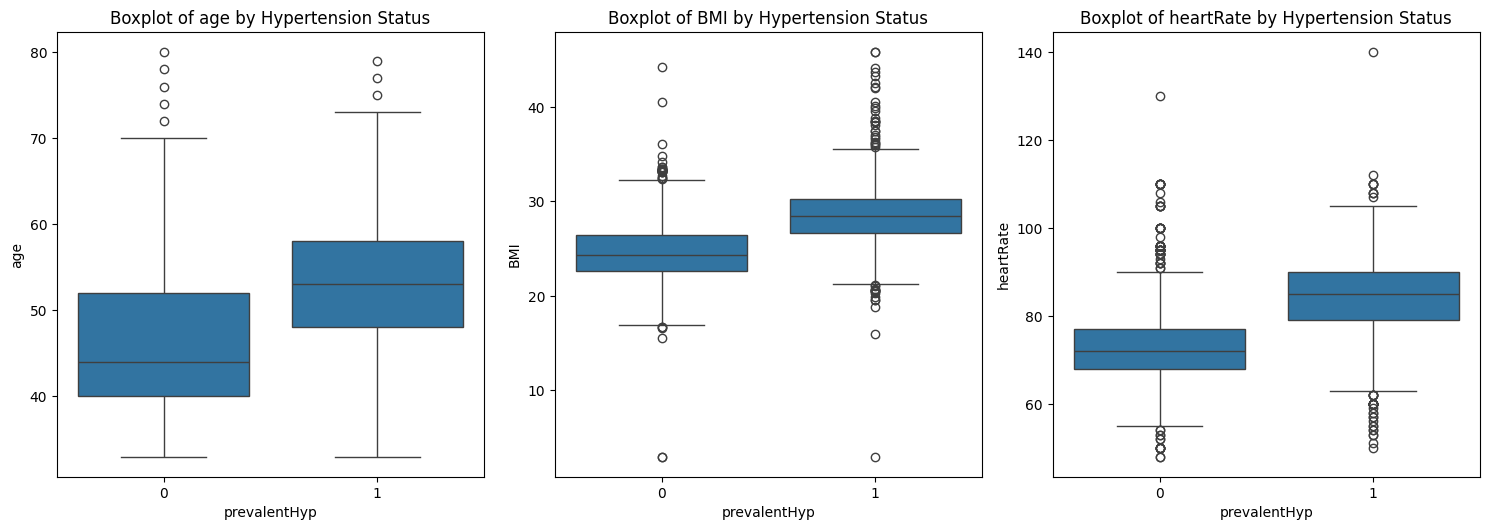

In [7]:
# 3. Boxplots of numeric features grouped by hypertensive disease status
numeric_features = ['age', 'BMI', 'heartRate'] 
plt.figure(figsize=(15,10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='prevalentHyp', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Hypertension Status')
plt.tight_layout()
plt.show()

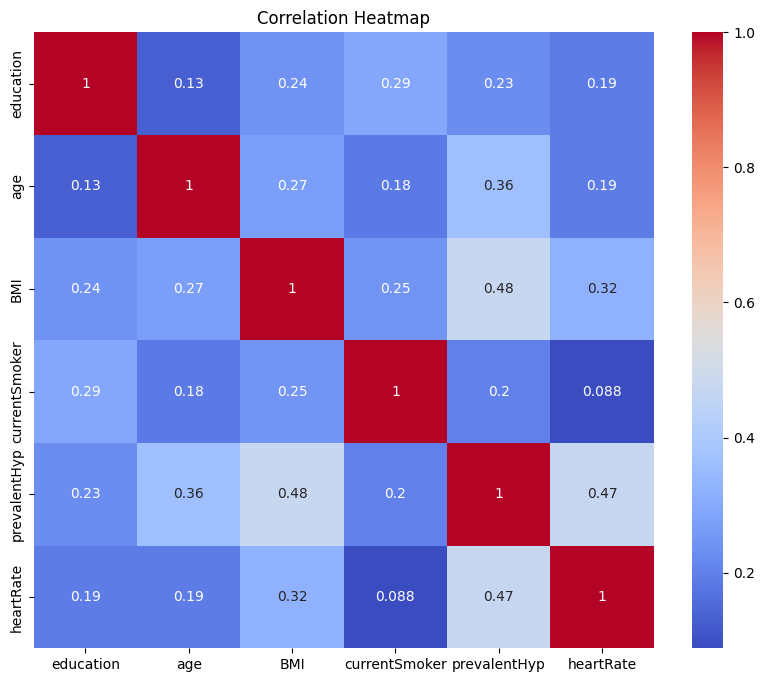

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

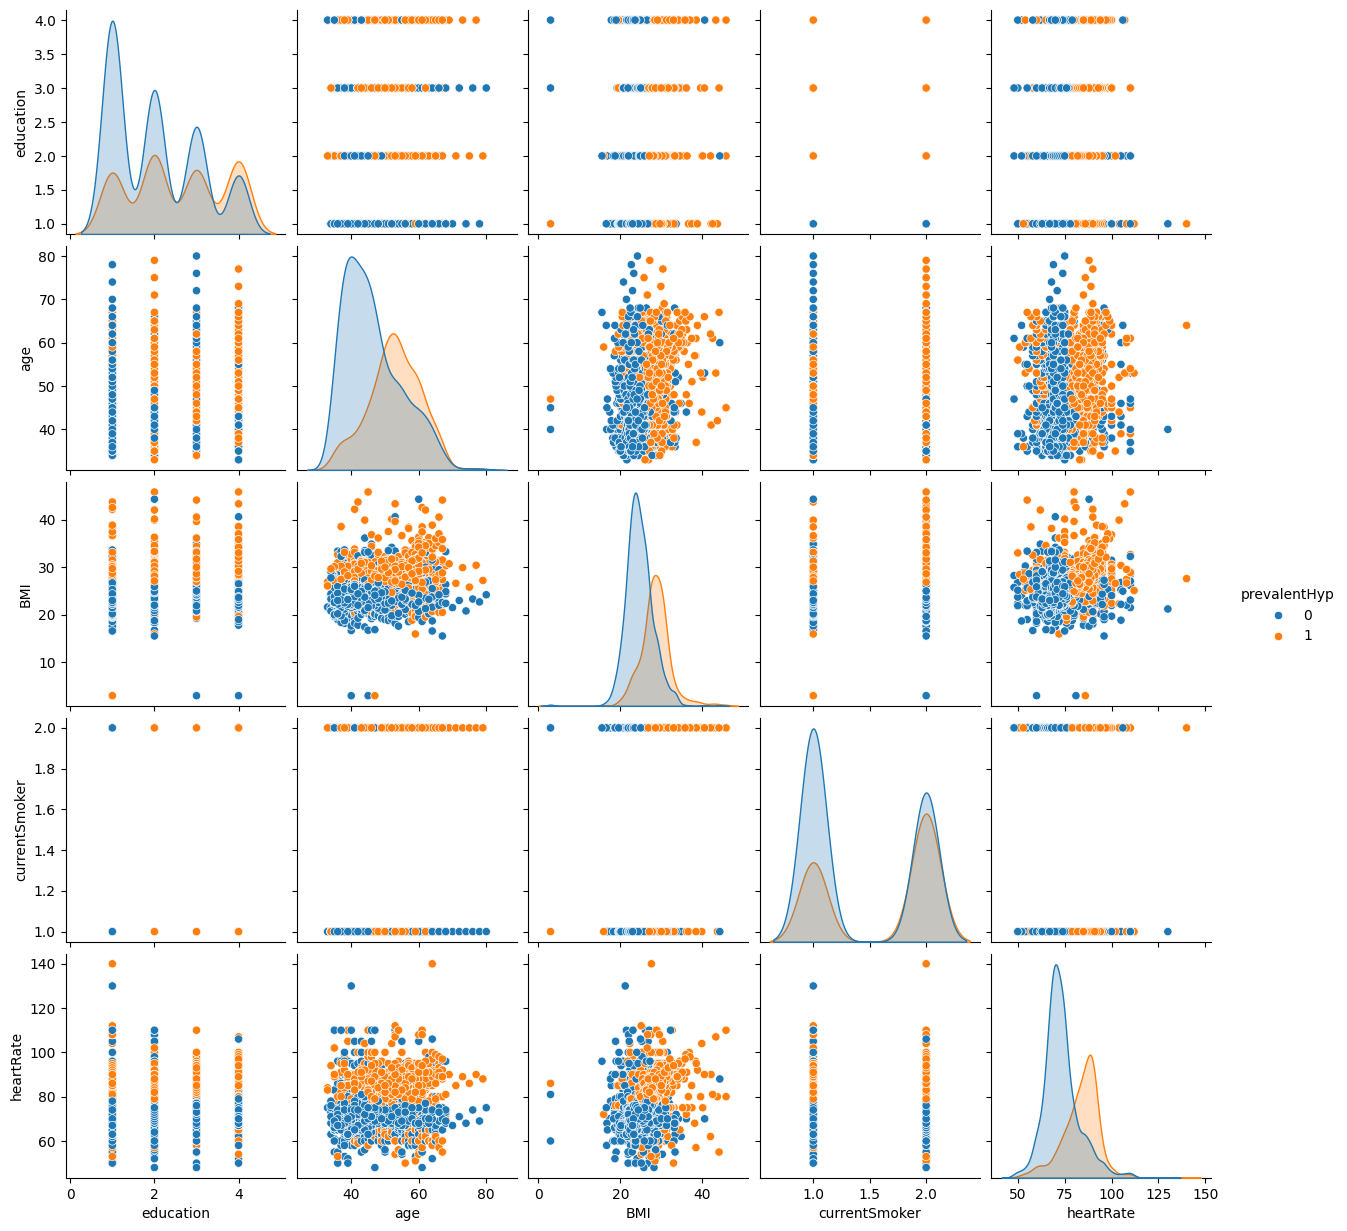

In [9]:
# Pairplot colored by Hypertension
sns.pairplot(df, hue='prevalentHyp')
plt.show()

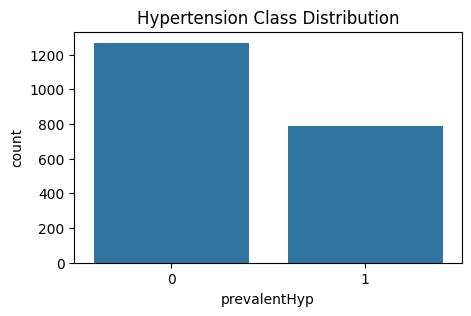

In [10]:
# Target Variable Distribution
plt.figure(figsize=(5,3))
sns.countplot(x='prevalentHyp', data=df)
plt.title('Hypertension Class Distribution')
plt.show()

# Preprocessing

Remove duplicates

In [11]:
df = df.drop_duplicates()

Fill missing values 

In [12]:
df.fillna(df.mean(numeric_only=True), inplace=True)

Split features and target

In [13]:
X = df.drop("prevalentHyp", axis=1)
y = df["prevalentHyp"]

Train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scale features

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models

In [16]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train, predict, evaluate, and cross-validate

In [17]:
results = {}
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    
    results[name] = {"accuracy": acc, "cv_accuracy": cv_scores.mean()}


Model: Logistic Regression
Accuracy: 0.7877
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       235
           1       0.76      0.69      0.72       156

    accuracy                           0.79       391
   macro avg       0.78      0.77      0.77       391
weighted avg       0.79      0.79      0.79       391

Confusion Matrix:
[[201  34]
 [ 49 107]]
Cross-Validation Accuracy: 0.8033

Model: Decision Tree
Accuracy: 0.7852
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       235
           1       0.75      0.70      0.72       156

    accuracy                           0.79       391
   macro avg       0.78      0.77      0.77       391
weighted avg       0.78      0.79      0.78       391

Confusion Matrix:
[[198  37]
 [ 47 109]]
Cross-Validation Accuracy: 0.7738

Model: Random Forest
Accuracy: 0.8107
Classification Report:
    

In [18]:
# Summary of accuracy scores
print("\nModel Accuracy Comparison:")
for name, metrics in results.items():
    print(f"{name} - Test Acc: {metrics['accuracy']:.4f}, CV Acc: {metrics['cv_accuracy']:.4f}")


Model Accuracy Comparison:
Logistic Regression - Test Acc: 0.7877, CV Acc: 0.8033
Decision Tree - Test Acc: 0.7852, CV Acc: 0.7738
Random Forest - Test Acc: 0.8107, CV Acc: 0.8206
SVM - Test Acc: 0.8107, CV Acc: 0.8353
Gradient Boosting - Test Acc: 0.8082, CV Acc: 0.8257


SVM has the highest cross-validation accuracy (0.8353) and ties with Random Forest for the highest test accuracy (0.8107).

Feature Importance for tree models

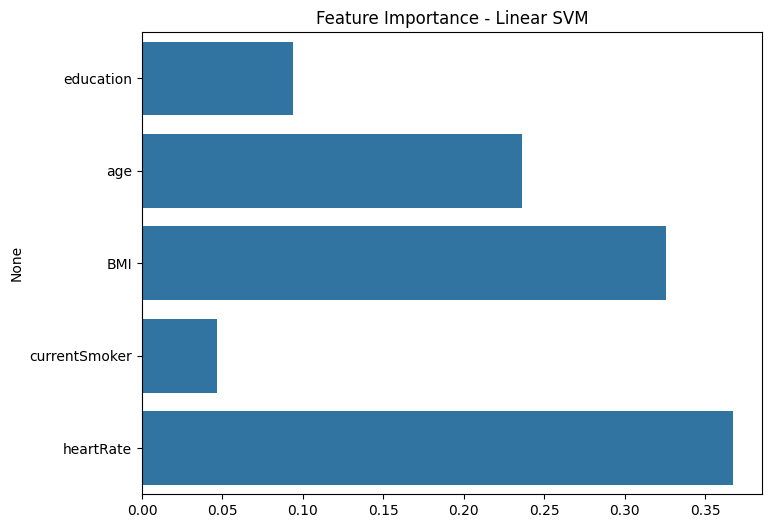

In [19]:
# Initialize and train linear SVM
linear_svm = LinearSVC(random_state=42, max_iter=10000)
linear_svm.fit(X_train_scaled, y_train)

# Get feature importance (coefficients)
feature_importances = np.abs(linear_svm.coef_[0])

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance - Linear SVM")
plt.show()

# Save best model (SVM)

In [21]:
best_model = models["SVM"]
joblib.dump(best_model, "Hypertensive Disease_SVM.pkl")
joblib.dump(scaler, "Hypertensive Disease_ scaler.pkl")

['Hypertensive Disease_ scaler.pkl']